# **COVID 19 – ESTUDO SOBRE A UTILIZAÇÃO DE GEOREFERENCIADORES PARA AUXILIO NA DETERMINAÇÃO DA NECESSIDADE DE HOSPITAIS DE CAMPANHA**

# **1. Definição do Problema**

## **Onde devemos criar hospitais de campanha na região metropolitana de São Paulo para ajudar a combater o COVID-19 ?**

Com o crescimento da COVID-19 no Brasil, será inevitável a instalações de hospitais de campanha, esse estudo visa apontar os melhores lugares para criação desses hospitais para melhor combater o COVID-19 e reduzir a taxa de mortalidade.

## Sobre a Região Metropolitana de São Paulo

A Região Metropolitana de São Paulo concentra 39 municípios e é o maior polo de riqueza nacional. Criada em 1973, foi reorganizada em 2011 pela LC 1.139 que instituiu o Conselho de Desenvolvimento e agrupou seus municípios em sub-regiões:

**Norte**: Caieiras, Cajamar, Francisco Morato, Franco da Rocha e Mairiporã.

**Leste**: Arujá, Biritiba-Mirim, Ferraz de Vasconcelos, Guararema, Guarulhos, Itaquaquecetuba, Mogi das Cruzes, Poá, Salesópolis, Santa Isabel e Suzano.

**Sudeste**: Diadema, Mauá, Ribeirão Pires, Rio Grande da Serra, Santo André, São Bernardo do Campo e São Caetano do Sul.

**Sudoeste**: Cotia, Embu das Artes, Embu-Guaçu, Itapecerica da Serra, Juquitiba, São Lourenço da Serra, Taboão da Serra e Vargem Grande Paulista.

**Oeste**: Barueri, Carapicuíba, Itapevi, Jandira, Osasco, Pirapora do Bom Jesus e Santana de Parnaíba.

O Município de **São Paulo** integra todas as sub-regiões mencionadas.

# **2. Coleta de Dados**

Para analisar o problema iremos utilizar os seguintes datasets:
*   **municipios_rmsp.csv**: Contém a lista de municípios da região metropolitana de São Paulo (Fonte: EMPLASA - Empresa Paulista de Planejamento Metropolitano S/A)
*   **covid19-cidades-sp.csv**: Contém os casos de COVID-19 (Fonte: Brasil.IO - O Brasil em dados libertos)
*   **dados_populacao_rmsp.csv**: Contém os dados dos municípios de São Paulo (Fonte: Fundação SEADE - Fundação Sistema Estadual de Análise de Dados)
*   **leitos_uti_adulto_covid19.csv**: Contém os dados de leitos de UTI adulto para COVID-19 (Fonte: Ministério da Saúde - Cadastro Nacional de Estabeleciomentos de Saúde)
*   **leitos_uti_pediatrica_covid19.csv**: Contém os dados de leitos de UTI pediatrica para COVID-19 (Fonte: Ministério da Saúde - Cadastro Nacional de Estabeleciomentos de Saúde)
*   **taxa_isolamento_por_municipio_20042020.csv**: Contém os dados de leitos de UTI pediatrica para COVID-19 (Fonte: Sistema de Monitoramento Inteligente do Governo de São Paulo)




In [0]:
#@title Importes neecssários para execução do projeto
#import pandasql as ps

# imports
import numpy as np
import pandas as pd
import os
import warnings

# bokeh packages
from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,HoverTool,CategoricalColorMapper
from bokeh.layouts import row,column,gridplot
from bokeh.models.widgets import Tabs,Panel
output_notebook()

# plotly packages
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objs import *

#configurações
warnings.filterwarnings('ignore')

#avoid truncate text
#pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_columns', None) 
#pd.set_option('display.max_rows', None)

In [4]:
#@title Uma amostra dos datasets de origem
# Fonte: https://github.com/datasets/covid-19/tree/master/data
data_municipios_rmsp = pd.read_csv('https://raw.githubusercontent.com/matheuxrp/hello-word/master/datasets_SP/municipios_rmsp.csv', encoding = "UTF-8")
display(data_municipios_rmsp.head())

# Fonte: https://github.com/datasets/covid-19/tree/master/data
data_time_series = pd.read_csv('https://raw.githubusercontent.com/matheuxrp/hello-word/master/datasets_SP/covid19-cidades-sp.csv', encoding = "UTF-8")
display(data_time_series.head())

# Fonte: https://www.kaggle.com/hbfree/covid19formattedweatherjan22march24#covid_dataset.csv
data_leitos_adulto = pd.read_csv('https://raw.githubusercontent.com/matheuxrp/hello-word/master/datasets_SP/leitos_uti_adulto_covid19.csv', encoding = "UTF-8")
display(data_leitos_adulto.head())

# Fonte: https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_GDP_(nominal)_per_capita
data_leitos_pediatria = pd.read_csv('https://raw.githubusercontent.com/matheuxrp/hello-word/master/datasets_SP/leitos_uti_pediatrica_covid19.csv', encoding = "UTF-8")
display(data_leitos_pediatria.head())

# Fonte: https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_GDP_(nominal)_per_capita
data_populacao_rmsp = pd.read_csv('https://raw.githubusercontent.com/matheuxrp/hello-word/master/datasets_SP/dados_populacao_rmsp.csv', encoding = "UTF-8")
display(data_populacao_rmsp.head())


# Fonte: https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_GDP_(nominal)_per_capita
data_isolamento_social = pd.read_csv('https://raw.githubusercontent.com/matheuxrp/hello-word/master/datasets_SP/isolamento_social_municipios.csv', encoding = "UTF-8")
display(data_isolamento_social.head())




,Município,Região,Latitude,Longitude
0,São Paulo,Centro,-23.5505,-46.6333
1,Arujá,Leste,-23.3970,-46.3204
2,Biritiba-Mirim,Leste,-23.5705,-46.0409
3,Ferraz de Vasconcelos,Leste,-23.5290,-46.3636
4,Guararema,Leste,-23.4129,-46.0350


,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-04-18,SP,Adamantina,city,1,0,True,35068.0,3500105.0,2.85160,NaN
1,2020-04-18,SP,Águas de Lindóia,city,1,1,True,18705.0,3500501.0,5.34616,1.0
2,2020-04-18,SP,Águas de São Pedro,city,1,0,True,3451.0,3500600.0,28.97711,NaN
3,2020-04-18,SP,Agudos,city,5,1,True,37214.0,3500709.0,13.43580,0.2
4,2020-04-18,SP,Alambari,city,1,0,True,6025.0,3500758.0,16.59751,NaN


,CNES,Estabelecimento,Município,Qtd_Leitos_UTI_Adulto,SUS
0,102741,HOSPITAL DE CAMPANHA COVID 19 ARARAQUARA,ARARAQUARA,20,0
1,2082853,HOSPITAL MAJOR ANTONIO CANDIDO BATATAIS,BATATAIS,1,0
2,2083272,HOSPITAL MUNICIPAL DE BERTIOGA,BERTIOGA,10,0
3,9549846,HOSPITAL BRAGANTINO,BRAGANCA PAULISTA,10,0
4,34053,AME AMBULATORIO MEDICO DE ESPECIALIDADES DE CA...,CAMPINAS,35,0


,CNES,Estabelecimento,Município,Qtd_Leitos_UTI_Pediatrica,SUS_Pediatrica
0,92894,HOSPITAL REGIONAL DO LITORAL NORTE,CARAGUATATUBA,10,0
1,5200105,HOSPITAL MUNICIPAL PIMENTAS BONSUCESSO MANUEL ...,GUARULHOS,2,0
2,2083116,SANTA CASA DE MARILIA,MARILIA,3,0
3,2772310,SANTA CASA DE PIRACICABA,PIRACICABA,3,0
4,2081164,HOSPITAL SANTA LYDIA RIBEIRAO PRETO,RIBEIRAO PRETO,2,0


,Área,População,Densidade Demográfica,Taxa Geométrica de Crescimento Anual da População - 2010/2020,Grau de Urbanização,Índice de Envelhecimento,População com Menos de 15 Anos,População com 60 Anos e Mais,Razão de Sexos,municipio
0,"96,17",89.744,"933,18","1,84","96,31","55,76","21,53","12,01","97,25",Arujá
1,"65,70",264.39,"4024,20","0,95","100,00","47,09","23,62","11,12","94,74",Barueri
2,"97,64",100.612,"1030,44","1,54","98,26","60,86","19,69","11,99","96,01",Caieiras
3,"131,39",77.627,"590,81","1,95","98,82","44,85","22,09","9,91","99,14",Cajamar
4,"34,55",394.598,"11421,07","0,66","100,00","58,79","21,98","12,92","94,44",Carapicuíba


,Município,DATA,Índice de isolamento
0,São Paulo,4/1/2020,56%
1,São Paulo,4/2/2020,56%
2,São Paulo,4/3/2020,56%
3,São Paulo,4/4/2020,58%
4,São Paulo,3/5/2020,28%


# **3. Processamento/Tratamento de Dados**

Nesta etapa iremos criar um único dataset resultado da junção de todos os datasets de origem citados na etapa "**2. Coleta de dados**".
Também iremos realizar os tratamentos necessários para que os dados fiquem prontos para serem utilizados como insumos para os modelos de Machine Learning.

Todos esses tratamentos foram realizamos no Knime gerando o dataset final  **dados_consolidados_regiao_metropolitana_sp.csv**

# **4. Análise/Exploração dos Dados**

In [5]:
#@title Dataset resultado da etapa "3. Processamento/Tratamento de Dados" realizados no Knime
# Fonte: https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_GDP_(nominal)_per_capita
df_final = pd.read_csv('https://raw.githubusercontent.com/matheuxrp/hello-word/master/datasets_SP/dados_consolidados_regiao_metropolitana_sp.csv', encoding = "iso-8859-1")
#df_final = pd.read_csv('/content/dados_consolidados_regiao_metropolitana_sp.csv', encoding = "iso-8859-1")
display(df_final.head())

,Data,Municipio,Confirmados,Mortos,Cod_IBGE,Confirmados_Por_100K_Habit.,Rate_Mortos,Regiao,Latitude,Longitude,Area,Populacao,Densidade_Demografica,Tx_Geomet_Cresc_Anual_Popul_2010_2020,Grau_Urbanizacao,Ind_Envelhecimento,Popul_Menos_15Anos,Popul_60Anos_Mais,Razao_Sexos,Ind_Isolamento(%),Total_Leitos_UTI_Adulto,Total_Leitos_UTI_Pediatrica,Total_SUS,Total_SUS_Pediatrica
0,2020-02-25,São Paulo,1,0,3550308,0.00816,0.0,Centro,-23.5505,-46.6333,1521.11,11869660,7803.29,0.54,99.1,82.2,18.99,15.61,90.89,0,957,20,20,0
1,2020-02-26,São Paulo,1,0,3550308,0.00816,0.0,Centro,-23.5505,-46.6333,1521.11,11869660,7803.29,0.54,99.1,82.2,18.99,15.61,90.89,0,957,20,20,0
2,2020-02-27,São Paulo,1,0,3550308,0.00816,0.0,Centro,-23.5505,-46.6333,1521.11,11869660,7803.29,0.54,99.1,82.2,18.99,15.61,90.89,0,957,20,20,0
3,2020-02-28,São Paulo,2,0,3550308,0.01632,0.0,Centro,-23.5505,-46.6333,1521.11,11869660,7803.29,0.54,99.1,82.2,18.99,15.61,90.89,0,957,20,20,0
4,2020-02-29,São Paulo,2,0,3550308,0.01632,0.0,Centro,-23.5505,-46.6333,1521.11,11869660,7803.29,0.54,99.1,82.2,18.99,15.61,90.89,0,957,20,20,0


In [6]:
#@title Tipos das colunas
# Convertemos o campo [Data] de Objeto para datetime para utilizarmos no projeto.
df_final["Data"] = pd.to_datetime(df_final["Data"])
df_final.dtypes

Data                                     datetime64[ns]
Municipio                                        object
Confirmados                                       int64
Mortos                                            int64
Cod_IBGE                                          int64
Confirmados_Por_100K_Habit.                     float64
Rate_Mortos                                     float64
Regiao                                           object
Latitude                                        float64
Longitude                                       float64
Area                                            float64
Populacao                                         int64
Densidade_Demografica                           float64
Tx_Geomet_Cresc_Anual_Popul_2010_2020           float64
Grau_Urbanizacao                                float64
Ind_Envelhecimento                              float64
Popul_Menos_15Anos                              float64
Popul_60Anos_Mais                               

In [7]:
#@title Características dos dados
# Verifica como estão os dados
df_final.describe()


,Confirmados,Mortos,Cod_IBGE,Confirmados_Por_100K_Habit.,Rate_Mortos,Latitude,Longitude,Area,Populacao,Densidade_Demografica,Tx_Geomet_Cresc_Anual_Popul_2010_2020,Grau_Urbanizacao,Ind_Envelhecimento,Popul_Menos_15Anos,Popul_60Anos_Mais,Razao_Sexos,Ind_Isolamento(%),Total_Leitos_UTI_Adulto,Total_Leitos_UTI_Pediatrica,Total_SUS,Total_SUS_Pediatrica
count,798.000000,798.000000,7.980000e+02,798.000000,798.000000,798.000000,798.000000,798.000000,7.980000e+02,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.0
mean,162.962406,10.874687,3.530038e+06,10.659960,0.066353,-23.540489,-46.631154,227.346416,9.398060e+05,4346.770777,1.156529,98.021967,65.513709,20.468559,13.013709,95.469311,46.864662,62.652882,1.686717,1.127820,0.0
std,877.012241,62.450417,1.645358e+04,11.629575,0.126631,0.126442,0.239272,349.584250,2.688656e+06,3974.901073,0.609380,3.802863,22.526449,1.924586,2.698907,3.065169,19.724240,219.995331,4.893557,4.616397,0.0
min,0.000000,0.000000,3.503901e+06,0.000000,0.000000,-23.928900,-47.071500,15.330000,2.643900e+04,58.220000,0.140000,81.170000,42.100000,14.660000,9.720000,86.820000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.000000,0.000000,3.515103e+06,1.998908,0.000000,-23.623400,-46.852200,42.490000,1.006120e+05,1030.440000,0.615000,98.260000,52.810000,19.030000,11.230000,94.370000,49.250000,0.000000,0.000000,0.000000,0.0
50%,14.500000,1.000000,3.528502e+06,6.987490,0.030450,-23.539300,-46.633300,97.640000,1.744030e+05,3559.240000,1.080000,100.000000,59.260000,20.750000,12.030000,95.490000,54.000000,0.000000,0.000000,0.000000,0.0
75%,43.000000,2.000000,3.547809e+06,15.242057,0.071775,-23.454300,-46.404200,270.820000,4.329050e+05,7083.270000,1.520000,100.000000,70.730000,21.980000,14.030000,97.217500,58.000000,20.000000,0.000000,0.000000,0.0
max,9428.000000,686.000000,3.556453e+06,76.950560,1.000000,-23.279400,-46.035000,1521.110000,1.186966e+07,13922.070000,2.450000,100.000000,157.500000,23.620000,23.100000,103.630000,71.000000,957.000000,20.000000,20.000000,0.0


In [83]:
#@title Correlação entre os campos
# Verificando a correlação entre as variáveis
df_final.corr()['Confirmados']


Confirmados                              1.000000
Mortos                                   0.997658
Cod_IBGE                                 0.191312
Confirmados_Por_100K_Habit.              0.520660
Rate_Mortos                              0.000559
Latitude                                -0.020704
Longitude                               -0.000883
Area                                     0.560232
Populacao                                0.614193
Densidade_Demografica                    0.139990
Tx_Geomet_Cresc_Anual_Popul_2010_2020   -0.167810
Grau_Urbanizacao                         0.052089
Ind_Envelhecimento                       0.121001
Popul_Menos_15Anos                      -0.125391
Popul_60Anos_Mais                        0.154767
Razao_Sexos                             -0.241042
Ind_Isolamento(%)                        0.054475
Total_Leitos_UTI_Adulto                  0.613772
Total_Leitos_UTI_Pediatrica              0.570279
Total_SUS                                0.614595


In [0]:
#@title ### Vamos Agrupar primeiramente por Região para fazermos as análises
df_norte = df_final.loc[(df_final['Regiao'] =="Norte")].groupby(['Data']).sum().sort_values(by=['Data'],ascending=False)
df_leste = df_final.loc[(df_final['Regiao'] =="Leste")].groupby(['Data']).sum().sort_values(by=['Data'],ascending=False)
df_sudeste = df_final.loc[(df_final['Regiao'] =="Sudeste")].groupby(['Data']).sum().sort_values(by=['Data'],ascending=False)
df_sudoeste = df_final.loc[(df_final['Regiao'] =="Sudoeste")].groupby(['Data']).sum().sort_values(by=['Data'],ascending=False)
df_oeste = df_final.loc[(df_final['Regiao'] =="Oeste")].groupby(['Data']).sum().sort_values(by=['Data'],ascending=False)


In [10]:
#@title  

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig = make_subplots(rows=1, cols=1,subplot_titles=('Casos Confirmados por Zonas da RMSP','',))
fig.append_trace(go.Line(name='Confirmados - Zona Norte', x=df_norte.index, y=df_norte['Confirmados']), row=1, col=1)
fig.append_trace(go.Line(name='Confirmados - Zona Leste', x=df_leste.index, y=df_leste['Confirmados']), row=1, col=1)
fig.append_trace(go.Line(name='Confirmados - Zona Sudeste', x=df_sudeste.index, y=df_sudeste['Confirmados']), row=1, col=1)
fig.append_trace(go.Line(name='Confirmados - Zona Sudoeste', x=df_sudoeste.index, y=df_sudoeste['Confirmados']), row=1, col=1)
fig.append_trace(go.Line(name='Confirmados - Zona Oeste', x=df_oeste.index, y=df_oeste['Confirmados']), row=1, col=1)


fig['layout'].update(layout)

fig.show()

# Podemos ver nesse gráfico que não há relação entre temperatura e casos, 
# pois a temperatura se mantem estável e os casos aumentam exponencialmente

In [11]:
#@title 

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig = make_subplots(rows=1, cols=1,subplot_titles=('Número de Óbitos por zonas da RMSP','',))
fig.append_trace(go.Line(name='Mortos - Zona Norte', x=df_norte.index, y=df_norte['Mortos']), row=1, col=1)
fig.append_trace(go.Line(name='Mortos - Zona Leste', x=df_leste.index, y=df_leste['Mortos']), row=1, col=1)
fig.append_trace(go.Line(name='Mortos - Zona Sudeste', x=df_sudeste.index, y=df_sudeste['Mortos']), row=1, col=1)
fig.append_trace(go.Line(name='Mortos - Zona Sudoeste', x=df_sudoeste.index, y=df_sudoeste['Mortos']), row=1, col=1)
fig.append_trace(go.Line(name='Mortos - Zona Oeste', x=df_oeste.index, y=df_oeste['Mortos']), row=1, col=1)


fig['layout'].update(layout)

fig.show()

# Podemos ver nesse gráfico que não há relação entre temperatura e casos, 
# pois a temperatura se mantem estável e os casos aumentam exponencialmente

Podemos verificar que embora tenhamos um maior número de casos confirmados na região sudeste com 868 casos contra 862 casos na região leste, a região que tem mais mortes é a zona leste com 48 mortes contra 45 mortes da região sudeste. 

In [12]:
#@title 

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig = make_subplots(rows=1, cols=2,subplot_titles=('Zona Sudeste','Zona Leste',))
fig.append_trace(go.Line(name='Confirmados - Zona Sudeste', x=df_sudeste.index, y=df_sudeste['Confirmados']), row=1, col=1)
fig.append_trace(go.Line(name='Mortos - Zona Sudeste', x=df_sudeste.index, y=df_sudeste['Mortos']), row=1, col=1)
fig.append_trace(go.Line(name='Confirmados - Zona Leste', x=df_leste.index, y=df_leste['Confirmados']), row=1, col=2)
fig.append_trace(go.Line(name='Mortos - Zona Leste', x=df_leste.index, y=df_leste['Mortos']), row=1, col=2)


fig['layout'].update(layout)

fig.show()

# Podemos ver nesse gráfico que não há relação entre temperatura e casos, 
# pois a temperatura se mantem estável e os casos aumentam exponencialmente

In [0]:
#@title Separamos as principais características por cidades e por região RMSP

df_cidades = df_final.groupby(['Municipio'])['Regiao','Area','Populacao','Densidade_Demografica','Tx_Geomet_Cresc_Anual_Popul_2010_2020',
'Grau_Urbanizacao','Ind_Envelhecimento','Popul_Menos_15Anos','Popul_60Anos_Mais','Razao_Sexos','Total_Leitos_UTI_Adulto',
'Total_Leitos_UTI_Pediatrica','Total_SUS','Total_SUS_Pediatrica'].agg('max')

# vamos agrupar por região
df_regiao = df_cidades.groupby('Regiao').agg('mean')

In [14]:
#@title Comparação das características por Região
display(df_regiao.style.background_gradient(cmap='Blues'))


,Area,Populacao,Densidade_Demografica,Tx_Geomet_Cresc_Anual_Popul_2010_2020,Grau_Urbanizacao,Ind_Envelhecimento,Popul_Menos_15Anos,Popul_60Anos_Mais,Razao_Sexos,Total_Leitos_UTI_Adulto,Total_Leitos_UTI_Pediatrica,Total_SUS,Total_SUS_Pediatrica
Regiao,,,,,,,,,,,,,
Centro,1521.110000,11869660.000000,7803.290000,0.540000,99.100000,82.200000,18.990000,15.610000,90.890000,957.000000,20.000000,20.000000,0.000000
Leste,233.024444,325400.555556,2795.778889,1.215556,94.076667,60.762222,20.947778,12.663333,96.438889,2.888889,0.222222,0.000000,0.000000
Norte,146.302000,120693.000000,1326.854000,1.644000,96.238000,55.790000,20.794000,11.448000,99.504000,0.000000,0.000000,0.000000,0.000000
Oeste,74.210000,266908.333333,6109.396667,1.221667,100.000000,54.821667,21.560000,11.718333,95.273333,5.500000,0.000000,0.000000,0.000000
Sudeste,118.385714,384370.000000,5566.045714,0.608571,99.770000,88.057143,18.244286,15.475714,93.582857,28.428571,2.000000,0.000000,0.000000
Sudoeste,183.688571,125601.285714,3056.380000,1.345714,97.472857,54.685714,21.908571,11.942857,96.954286,0.285714,0.000000,0.000000,0.000000


In [16]:
#@title Comparação das características por cidades
display(df_cidades.style.background_gradient(cmap='Blues'))

,Regiao,Area,Populacao,Densidade_Demografica,Tx_Geomet_Cresc_Anual_Popul_2010_2020,Grau_Urbanizacao,Ind_Envelhecimento,Popul_Menos_15Anos,Popul_60Anos_Mais,Razao_Sexos,Total_Leitos_UTI_Adulto,Total_Leitos_UTI_Pediatrica,Total_SUS,Total_SUS_Pediatrica
Municipio,,,,,,,,,,,,,,
Arujá,Leste,96.170000,89744,933.180000,1.840000,96.310000,55.760000,21.530000,12.010000,97.250000,0,0,0,0
Barueri,Oeste,65.700000,26439,4024.200000,0.950000,100.000000,47.090000,23.620000,11.120000,94.740000,0,0,0,0
Caieiras,Norte,97.640000,100612,1030.440000,1.540000,98.260000,60.860000,19.690000,11.990000,96.010000,0,0,0,0
Cajamar,Norte,131.390000,77627,590.810000,1.950000,98.820000,44.850000,22.090000,9.910000,99.140000,0,0,0,0
Carapicuíba,Oeste,34.550000,394598,11421.070000,0.660000,100.000000,58.790000,21.980000,12.920000,94.440000,3,0,0,0
Cotia,Sudoeste,323.990000,247424,763.680000,2.120000,100.000000,52.810000,21.700000,11.460000,95.790000,0,0,0,0
Diadema,Sudeste,30.730000,404477,13162.280000,0.470000,100.000000,56.470000,20.920000,11.810000,93.690000,20,0,0,0
Embu das Artes,Sudoeste,70.400000,27079,3846.450000,1.220000,100.000000,47.990000,22.810000,10.950000,94.560000,0,0,0,0
Embu-Guaçu,Sudoeste,155.640000,68053,437.250000,0.820000,97.330000,65.400000,20.390000,13.330000,97.850000,0,0,0,0


## Verificando quais dados tem correlação com a quantidade de contaminados e mortos

Abaixo uma pequena explicação de como interpretar o coeficiente de correlação:

![alt text](https://github.com/matheuxrp/hello-word/blob/master/Screenshot%20from%202020-04-11%2016-39-28.png?raw=true)

## Verificando quais variáveis tem maior correlação com os dados de Contaminados e Mortos

Utilizando a métrica descrita no início dessa sessão, podemos utilizar o método 'corr' ,para demonstrar quais variáveis tem maior correlação com outras.

In [21]:
#@title Correlação entre variáveis da região Norte
display(df_norte.corr().style.background_gradient(cmap='Blues'))

,Confirmados,Mortos,Cod_IBGE,Confirmados_Por_100K_Habit.,Rate_Mortos,Latitude,Longitude,Area,Populacao,Densidade_Demografica,Tx_Geomet_Cresc_Anual_Popul_2010_2020,Grau_Urbanizacao,Ind_Envelhecimento,Popul_Menos_15Anos,Popul_60Anos_Mais,Razao_Sexos,Ind_Isolamento(%),Total_Leitos_UTI_Adulto,Total_Leitos_UTI_Pediatrica,Total_SUS,Total_SUS_Pediatrica
Confirmados,1.000000,0.936525,0.638970,0.999192,0.666498,-0.638875,-0.638997,0.554394,0.663648,0.691754,0.615344,0.641277,0.627788,0.644338,0.635216,0.637846,0.589363,nan,nan,nan,nan
Mortos,0.936525,1.000000,0.701429,0.945797,0.848192,-0.701311,-0.701462,0.600723,0.732278,0.770319,0.672695,0.704272,0.687867,0.708054,0.696869,0.700045,0.648370,nan,nan,nan,nan
Cod_IBGE,0.638970,0.701429,1.000000,0.658288,0.819443,-1.000000,-0.999999,0.961965,0.993654,0.952476,0.996521,0.999939,0.998000,0.999658,0.999470,0.999983,0.967366,nan,nan,nan,nan
Confirmados_Por_100K_Habit.,0.999192,0.945797,0.658288,1.000000,0.688020,-0.658194,-0.658317,0.573208,0.682659,0.709593,0.634720,0.660581,0.647078,0.663629,0.654514,0.657174,0.608297,nan,nan,nan,nan
Rate_Mortos,0.666498,0.848192,0.819443,0.688020,1.000000,-0.819316,-0.819485,0.705017,0.853832,0.893942,0.787100,0.822556,0.804061,0.826837,0.814218,0.817965,0.809582,nan,nan,nan,nan
Latitude,-0.638875,-0.701311,-1.000000,-0.658194,-0.819316,1.000000,1.000000,-0.961935,-0.993617,-0.952384,-0.996539,-0.999939,-0.997977,-0.999662,-0.999454,-0.999984,-0.967371,nan,nan,nan,nan
Longitude,-0.638997,-0.701462,-0.999999,-0.658317,-0.819485,1.000000,1.000000,-0.961769,-0.993664,-0.952528,-0.996498,-0.999945,-0.997938,-0.999678,-0.999435,-0.999982,-0.967358,nan,nan,nan,nan
Area,0.554394,0.600723,0.961965,0.573208,0.705017,-0.961935,-0.961769,1.000000,0.930767,0.845571,0.979062,0.959404,0.976170,0.954614,0.968902,0.962552,0.936649,nan,nan,nan,nan
Populacao,0.663648,0.732278,0.993654,0.682659,0.853832,-0.993617,-0.993664,0.930767,1.000000,0.978884,0.980943,0.994309,0.987704,0.995462,0.991756,0.993381,0.958492,nan,nan,nan,nan
Densidade_Demografica,0.691754,0.770319,0.952476,0.709593,0.893942,-0.952384,-0.952528,0.845571,0.978884,1.000000,0.924792,0.955060,0.938480,0.958677,0.947552,0.951299,0.914352,nan,nan,nan,nan


In [22]:
#@title Correlação entre variáveis da região Leste
display(df_leste.corr().style.background_gradient(cmap='Blues'))

,Confirmados,Mortos,Cod_IBGE,Confirmados_Por_100K_Habit.,Rate_Mortos,Latitude,Longitude,Area,Populacao,Densidade_Demografica,Tx_Geomet_Cresc_Anual_Popul_2010_2020,Grau_Urbanizacao,Ind_Envelhecimento,Popul_Menos_15Anos,Popul_60Anos_Mais,Razao_Sexos,Ind_Isolamento(%),Total_Leitos_UTI_Adulto,Total_Leitos_UTI_Pediatrica,Total_SUS,Total_SUS_Pediatrica
Confirmados,1.000000,0.988139,0.693196,0.997943,0.762639,-0.693100,-0.692944,0.677578,0.523828,0.591103,0.704808,0.683417,0.702729,0.691330,0.700323,0.697418,0.545043,0.441886,0.305629,nan,nan
Mortos,0.988139,1.000000,0.636449,0.984951,0.795649,-0.636370,-0.636205,0.622745,0.476433,0.537826,0.647554,0.627070,0.646018,0.634536,0.643605,0.640504,0.489672,0.405806,0.277076,nan,nan
Cod_IBGE,0.693196,0.636449,1.000000,0.691821,0.654566,-1.000000,-1.000000,0.992308,0.931988,0.983936,0.999105,0.999831,0.999762,0.999978,0.999869,0.999969,0.965617,0.758685,0.669746,nan,nan
Confirmados_Por_100K_Habit.,0.997943,0.984951,0.691821,1.000000,0.748580,-0.691717,-0.691574,0.675776,0.524388,0.592296,0.703185,0.682225,0.700927,0.690063,0.698628,0.695956,0.543909,0.439787,0.305385,nan,nan
Rate_Mortos,0.762639,0.795649,0.654566,0.748580,1.000000,-0.654472,-0.654407,0.639396,0.531767,0.598907,0.660330,0.648877,0.659185,0.653801,0.658098,0.656915,0.535287,0.425001,0.324175,nan,nan
Latitude,-0.693100,-0.636370,-1.000000,-0.691717,-0.654472,1.000000,1.000000,-0.992345,-0.932113,-0.983974,-0.999102,-0.999840,-0.999766,-0.999976,-0.999872,-0.999965,-0.965708,-0.758904,-0.670014,nan,nan
Longitude,-0.692944,-0.636205,-1.000000,-0.691574,-0.654407,1.000000,1.000000,-0.992293,-0.932165,-0.984026,-0.999107,-0.999841,-0.999750,-0.999980,-0.999861,-0.999966,-0.965718,-0.759005,-0.670143,nan,nan
Area,0.677578,0.622745,0.992308,0.675776,0.639396,-0.992345,-0.992293,1.000000,0.949522,0.975274,0.988169,0.992748,0.993181,0.991686,0.992818,0.991870,0.963611,0.788458,0.705879,nan,nan
Populacao,0.523828,0.476433,0.931988,0.524388,0.531767,-0.932113,-0.932165,0.949522,1.000000,0.954477,0.920159,0.936797,0.929320,0.931698,0.929628,0.929947,0.948040,0.922991,0.882640,nan,nan
Densidade_Demografica,0.591103,0.537826,0.983936,0.592296,0.598907,-0.983974,-0.984026,0.975274,0.954477,1.000000,0.979041,0.986526,0.981028,0.984500,0.981900,0.982758,0.984345,0.787533,0.720790,nan,nan


In [23]:
#@title Correlação entre variáveis da região Oeste
display(df_oeste.corr().style.background_gradient(cmap='Blues'))

,Confirmados,Mortos,Cod_IBGE,Confirmados_Por_100K_Habit.,Rate_Mortos,Latitude,Longitude,Area,Populacao,Densidade_Demografica,Tx_Geomet_Cresc_Anual_Popul_2010_2020,Grau_Urbanizacao,Ind_Envelhecimento,Popul_Menos_15Anos,Popul_60Anos_Mais,Razao_Sexos,Ind_Isolamento(%),Total_Leitos_UTI_Adulto,Total_Leitos_UTI_Pediatrica,Total_SUS,Total_SUS_Pediatrica
Confirmados,1.000000,0.983355,0.691081,0.999427,0.872320,-0.690991,-0.691045,0.684077,0.654282,0.659497,0.728691,0.690951,0.680359,0.690379,0.679993,0.692230,0.649476,0.562817,nan,nan,nan
Mortos,0.983355,1.000000,0.595727,0.978050,0.858395,-0.595646,-0.595695,0.589471,0.562873,0.567542,0.629876,0.595610,0.586111,0.595104,0.585788,0.596759,0.549768,0.482282,nan,nan,nan
Cod_IBGE,0.691081,0.595727,1.000000,0.705829,0.745155,-1.000000,-1.000000,0.997908,0.990301,0.993146,0.985024,1.000000,0.999228,0.999969,0.999261,0.999990,0.984412,0.923870,nan,nan,nan
Confirmados_Por_100K_Habit.,0.999427,0.978050,0.705829,1.000000,0.871541,-0.705738,-0.705792,0.698838,0.669075,0.674181,0.743142,0.705698,0.695130,0.705111,0.694746,0.706975,0.664545,0.576947,nan,nan,nan
Rate_Mortos,0.872320,0.858395,0.745155,0.871541,1.000000,-0.745076,-0.745111,0.740252,0.719312,0.721235,0.767516,0.745045,0.737771,0.744359,0.737208,0.745929,0.723473,0.642012,nan,nan,nan
Latitude,-0.690991,-0.595646,-1.000000,-0.705738,-0.745076,1.000000,1.000000,-0.997892,-0.990308,-0.993186,-0.984984,-1.000000,-0.999234,-0.999972,-0.999271,-0.999990,-0.984396,-0.923830,nan,nan,nan
Longitude,-0.691045,-0.595695,-1.000000,-0.705792,-0.745111,1.000000,1.000000,-0.997886,-0.990278,-0.993166,-0.985020,-1.000000,-0.999225,-0.999973,-0.999263,-0.999990,-0.984393,-0.923754,nan,nan,nan
Area,0.684077,0.589471,0.997908,0.698838,0.740252,-0.997892,-0.997886,1.000000,0.990416,0.989343,0.978745,0.997895,0.997907,0.997753,0.997688,0.997739,0.986384,0.940443,nan,nan,nan
Populacao,0.654282,0.562873,0.990301,0.669075,0.719312,-0.990308,-0.990278,0.990416,1.000000,0.996718,0.954791,0.990320,0.994775,0.989889,0.994299,0.989751,0.975183,0.958823,nan,nan,nan
Densidade_Demografica,0.659497,0.567542,0.993146,0.674181,0.721235,-0.993186,-0.993166,0.989343,0.996718,1.000000,0.962019,0.993198,0.996296,0.993246,0.996459,0.992782,0.974704,0.936441,nan,nan,nan


In [24]:
#@title Correlação entre variáveis da região Sudeste
display(df_sudeste.corr().style.background_gradient(cmap='Blues'))

,Confirmados,Mortos,Cod_IBGE,Confirmados_Por_100K_Habit.,Rate_Mortos,Latitude,Longitude,Area,Populacao,Densidade_Demografica,Tx_Geomet_Cresc_Anual_Popul_2010_2020,Grau_Urbanizacao,Ind_Envelhecimento,Popul_Menos_15Anos,Popul_60Anos_Mais,Razao_Sexos,Ind_Isolamento(%),Total_Leitos_UTI_Adulto,Total_Leitos_UTI_Pediatrica,Total_SUS,Total_SUS_Pediatrica
Confirmados,1.000000,0.963788,0.827010,0.999581,0.844808,-0.826814,-0.826370,0.742044,0.684139,0.683631,0.899617,0.826600,0.795070,0.830574,0.803000,0.829509,0.472123,0.624750,nan,nan,nan
Mortos,0.963788,1.000000,0.707072,0.962482,0.863203,-0.706920,-0.706542,0.628547,0.585755,0.587550,0.772368,0.706733,0.677284,0.710767,0.684823,0.709256,0.384828,0.537826,nan,nan,nan
Cod_IBGE,0.827010,0.707072,1.000000,0.824688,0.778219,-0.999999,-0.999997,0.977204,0.948252,0.937212,0.963246,0.999999,0.995909,0.999769,0.997819,0.999977,0.796678,0.897521,nan,nan,nan
Confirmados_Por_100K_Habit.,0.999581,0.962482,0.824688,1.000000,0.833935,-0.824479,-0.824018,0.740490,0.678112,0.676799,0.899263,0.824259,0.793036,0.828054,0.800795,0.827250,0.468534,0.616813,nan,nan,nan
Rate_Mortos,0.844808,0.863203,0.778219,0.833935,1.000000,-0.778379,-0.778525,0.739630,0.773210,0.777375,0.741307,0.778416,0.766442,0.781376,0.771265,0.777780,0.602685,0.758413,nan,nan,nan
Latitude,-0.826814,-0.706920,-0.999999,-0.824479,-0.778379,1.000000,0.999999,-0.977181,-0.948542,-0.937554,-0.963082,-1.000000,-0.995901,-0.999780,-0.997820,-0.999971,-0.796844,-0.897952,nan,nan,nan
Longitude,-0.826370,-0.706542,-0.999997,-0.824018,-0.778525,0.999999,1.000000,-0.977279,-0.948978,-0.938020,-0.962750,-1.000000,-0.995944,-0.999781,-0.997859,-0.999960,-0.797315,-0.898544,nan,nan,nan
Area,0.742044,0.628547,0.977204,0.740490,0.739630,-0.977181,-0.977279,1.000000,0.947921,0.924203,0.899721,0.977252,0.992386,0.972906,0.988986,0.976318,0.867741,0.889030,nan,nan,nan
Populacao,0.684139,0.585755,0.948252,0.678112,0.773210,-0.948542,-0.948978,0.947921,1.000000,0.997061,0.838363,0.948718,0.953990,0.949035,0.955126,0.946173,0.861420,0.988492,nan,nan,nan
Densidade_Demografica,0.683631,0.587550,0.937212,0.676799,0.777375,-0.937554,-0.938020,0.924203,0.997061,1.000000,0.831329,0.937731,0.937578,0.939605,0.940475,0.935133,0.836619,0.994943,nan,nan,nan


In [25]:
#@title Correlação entre variáveis da região Sudoeste
display(df_sudoeste.corr().style.background_gradient(cmap='Blues'))

,Confirmados,Mortos,Cod_IBGE,Confirmados_Por_100K_Habit.,Rate_Mortos,Latitude,Longitude,Area,Populacao,Densidade_Demografica,Tx_Geomet_Cresc_Anual_Popul_2010_2020,Grau_Urbanizacao,Ind_Envelhecimento,Popul_Menos_15Anos,Popul_60Anos_Mais,Razao_Sexos,Ind_Isolamento(%),Total_Leitos_UTI_Adulto,Total_Leitos_UTI_Pediatrica,Total_SUS,Total_SUS_Pediatrica
Confirmados,1.000000,0.983291,0.811563,0.999508,0.417247,-0.813686,-0.812450,0.893050,0.729575,0.506458,0.707058,0.804044,0.839498,0.803751,0.831069,0.818101,0.545241,0.532660,nan,nan,nan
Mortos,0.983291,1.000000,0.858108,0.983111,0.456299,-0.859970,-0.858869,0.890396,0.785512,0.578209,0.764568,0.852276,0.882910,0.850749,0.875073,0.863531,0.616108,0.481697,nan,nan,nan
Cod_IBGE,0.811563,0.858108,1.000000,0.811436,0.608181,-0.999990,-0.999998,0.849896,0.980191,0.885703,0.981618,0.999745,0.997653,0.999832,0.998795,0.999892,0.875409,0.367557,nan,nan,nan
Confirmados_Por_100K_Habit.,0.999508,0.983111,0.811436,1.000000,0.432069,-0.813584,-0.812336,0.902121,0.725586,0.504048,0.705617,0.803438,0.840129,0.803575,0.831678,0.818065,0.539986,0.553302,nan,nan,nan
Rate_Mortos,0.417247,0.456299,0.608181,0.432069,1.000000,-0.607517,-0.607902,0.592914,0.543504,0.676721,0.616088,0.601289,0.610165,0.610798,0.615005,0.604130,0.485166,0.564302,nan,nan,nan
Latitude,-0.813686,-0.859970,-0.999990,-0.813584,-0.607517,1.000000,0.999997,-0.851767,-0.979618,-0.883857,-0.980772,-0.999667,-0.997908,-0.999755,-0.998968,-0.999941,-0.873937,-0.369771,nan,nan,nan
Longitude,-0.812450,-0.858869,-0.999998,-0.812336,-0.607902,0.999997,1.000000,-0.850741,-0.979950,-0.884913,-0.981266,-0.999712,-0.997758,-0.999804,-0.998869,-0.999916,-0.874817,-0.368620,nan,nan,nan
Area,0.893050,0.890396,0.849896,0.902121,0.592914,-0.851767,-0.850741,1.000000,0.753063,0.570984,0.749297,0.838101,0.873896,0.845143,0.869486,0.856242,0.585908,0.766627,nan,nan,nan
Populacao,0.729575,0.785512,0.980191,0.725586,0.543504,-0.979618,-0.979950,0.753063,1.000000,0.930072,0.985327,0.983574,0.965963,0.982535,0.969882,0.978296,0.941725,0.226382,nan,nan,nan
Densidade_Demografica,0.506458,0.578209,0.885703,0.504048,0.676721,-0.883857,-0.884913,0.570984,0.930072,1.000000,0.944440,0.891867,0.857791,0.892305,0.866962,0.878970,0.931075,0.123799,nan,nan,nan


## Vamos verificar a Distribuição dos dados utilizando o gráfico de Histograma

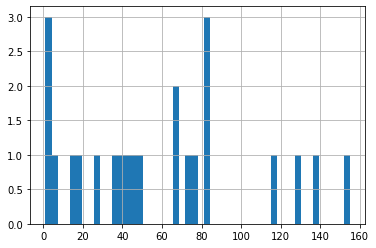

In [37]:
#@title Histograma da quantidade de Contaminados na região norte
df_norte['Confirmados'].hist(bins=50) #bins = quantidade de linhas do histagram

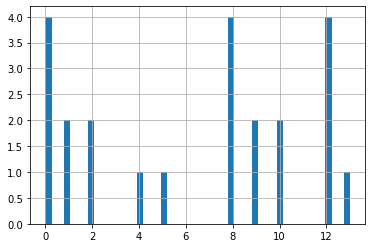

In [107]:
#@title Histograma da quantidade de Mortos na região norte

import numpy as np
import matplotlib.pyplot as plt
#df_hist_norte = df_norte['Mortos','Confirmados']
df_norte['Mortos'].hist(bins=50)#(bins=12, alpha=0.5) #, figsize=(100,200))

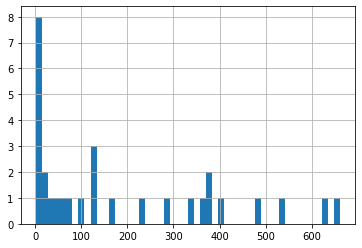

In [27]:
#@title Histograma da quantidade de Contaminados na região Leste
df_leste.Confirmados.hist(bins=50)

In [63]:
#@title Verifica se o dataset da região norte é uma distribuição normal
from scipy.stats import normaltest
display('Confirmados da Região Norte')
display(normaltest(df_norte.Confirmados))
display('Mortos da Região Norte')
display(normaltest(df_norte.Mortos))

'Confirmados da Região Norte'

NormaltestResult(statistic=1.6788016801527905, pvalue=0.43196926457924)

'Mortos da Região Norte'

NormaltestResult(statistic=10.626152916919773, pvalue=0.004926746448128341)

## **Diagrama de Dispersão**

O diagrama de dispersão é conhecido como uma das principais ferramentas da qualidade que podem ser utilizadas por uma empresa.

Trata-se de uma representação gráfica que analisa a relação entre duas variáveis quantitativas — uma de causa e uma de efeito. 
Quando você tem uma hipótese do que causou algo, mas ainda deseja comprová-la por meio de uma análise mais aprofundada.

Esse tipo de diagrama traz números simultâneos das duas variáveis, deixando visível se o que acontece em uma variável 
causou interferência na outra. Ao estudar a correlação, você tem uma variável dependente Y (efeito), que se relaciona 
a variáveis independentes X (causas).

O modelo hipotético seria, portanto, y = f (x).

Ainda não entendeu o que é diagrama de dispersão? Calma, logo mais daremos um exemplo. Mas, ainda sobre a definição do termo, 
você deve saber que essa correlação criada com base no diagrama pode ser:

Positiva: quando os pontos se unem em uma linha crescente. Isso quer dizer que, assim que uma variável aumenta, a outra também cresce;
Negativa: quando os pontos se unem em uma linha decrescente. O que significa que, à medida que uma variável aumenta, a outra diminui;
Nula: quando os pontos estão bem dispersos e, portanto, indica que não há correlação aparente entre as duas variáveis.


In [0]:
#@title Diagrama de Dispersão ( para ver se mortes e confirmados tem correlação)
import plotly.express as px
fig = px.scatter(x=df_norte['Mortos'], y=df_norte['Confirmados'])
display(fig.show())

None

# **5. Criação de Modelo de ML**

In [0]:
#@title 
#import pandasql as ps


# imports
import numpy as np
import pandas as pd
import os

# bokeh packages
from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,HoverTool,CategoricalColorMapper
from bokeh.layouts import row,column,gridplot
from bokeh.models.widgets import Tabs,Panel
output_notebook()

# plotly packages
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objs import *

#avoid truncate text
#pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_columns', None) 
#pd.set_option('display.max_rows', None)

## Vamos testar alguns modelos para tentarmos prever os futuros casos

Examinando a Série Temporal de Casos e Prevendo o Número de casos

O gráfico abaixo exibe os casos confirmados através do tempo

## Utilizando a Regressão Linear Simples

Vamos utilizar o regressão linear simples para tentarmos prever os próximos casos

In [0]:
#@title Dados utilizados no modelo
# Regressão linear simples

import plotly.graph_objects as go
import datetime
import numpy as np

df2 = df_norte

df2['Date'] = pd.to_datetime(df2.index)
df2 = df2.sort_values(by=['Date'],ascending=True)
#df2 = df2.loc[df2['Date'] >= '02-03-2020']
df2['dias'] = range(1,len(df2) + 1,1)

## Treino
dias_train = df2['dias'][:int(0.9*len(df2))] # 90% dos casos
cases_train = df2['Confirmados'][:int(0.9*len(df2))] #90% dos casos

## Teste
dias_test = df2['dias'][int(0.9*len(df2)):] # 10% dos casos
cases_test =  df2['Confirmados'][int(0.9*len(df2)):] # 10% dos casos

previsao = len(df2) - len(dias_test)

#coloca a quantidade de dias que o modelo irá prever
df_teste = pd.DataFrame([23,24,25,26,27,28,29,30])

print("Holdout: Dados Totais: %d, Treino: %d dias, Teste: %d dias" % (len(df2),len(dias_train),len(dias_test)))

Holdout: Dados Totais: 23, Treino: 20 dias, Teste: 3 dias


In [0]:
#@title Número de casos estimados utilizando regressão linear
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(dias_train.values.reshape(-1,1), cases_train)
y_previsto = reg.predict(df_teste.values.reshape(-1,1)) #dias_test.values.reshape(-1,1))

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title= "Estimador linear para o número de casos confirmados",
    xaxis_title="Dias desde a primeira notificação",
    yaxis_title="Quantidade de casos",
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)

fig = go.Figure(data=[
    go.Scatter(x=dias_train, y=df2['Confirmados'][:int(0.9*len(df2))], name='Dados de Treinamento',mode="lines+markers"),
    go.Scatter(x=df_teste[0], y=y_previsto, name = 'Casos Estimados',mode="lines+markers"),
    go.Scatter(x=dias_test, y=df2['Confirmados'][int(0.9*len(df2)):], name = 'Casos Reais',mode="lines+markers")
])
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0= previsao + 0.5,
            y0=120,
            x1=previsao + 0.5,
            y1=50,
            line=dict(
                width=1.5,
                dash= "dash"
            )
))

fig.add_trace(go.Scatter(
    x=[previsao + 0.5],
    y=[2],
    text=["Início da previsão"],
    mode="text",
))
fig['layout'].update(layout)

fig.show()


In [0]:
#@title valores de erro do modelo de regressão linear simples
from sklearn.metrics import mean_squared_error, r2_score
print("Erro médio quadrático: ",mean_squared_error(cases_test,y_previsto[0:1]))
print("R^2 Score: ", r2_score(cases_test,y_previsto[0:1]))

Erro médio quadrático:  882.9387755102046
R^2 Score:  nan


## Utilizando a regressão polinomial

In [0]:
#@title Dados utilizados no modelo
# Como se comporta uma estimador baseado em regressão polinomial para o número de casos?

import plotly.graph_objects as go
import datetime
import numpy as np

log_y_data = np.log(df2['Confirmados'])

cases_train_log = log_y_data[:int(0.9*len(df2))]
cases_test_log = log_y_data[int(0.9*len(df2)):]

print("Holdout: Dados Totais: %d, Treino: %d dias, Teste: %d dias" % (len(df2),len(dias_train),len(dias_test)))

Holdout: Dados Totais: 23, Treino: 20 dias, Teste: 3 dias


In [0]:
#@title Número de casos estimados utilizando estimador polinomial
# Treino do modelo (interpolação da curva)
curve_fit = np.polyfit(dias_train, cases_train_log, 1)
y_train = (np.exp(curve_fit[1]) * np.exp(curve_fit[0]*dias_train)).astype(int)
y_estimado = (np.exp(curve_fit[1]) * np.exp(curve_fit[0]*dias_test)).astype(int)

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title= "Estimador polinomial para o número de casos",
    xaxis_title="Dias desde a primeira notificação",
    yaxis_title="Quantidade de casos",
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)

fig = go.Figure(data=[
    go.Scatter(x=dias_train, y=df2['Confirmados'][:int(0.9*len(df2))], name='Dados de Treinamento',mode="lines+markers"),
    go.Scatter(x=dias_test, y=y_estimado, name = 'Casos Estimados',mode="lines+markers"),
    go.Scatter(x=dias_test, y=df2['Confirmados'][int(0.9*len(df2)):], name = 'Casos Reais',mode="lines+markers")
])
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0= previsao + 0.5,
            y0=120,
            x1=previsao + 0.5,
            y1=500,
            line=dict(
                width=1.5,
                dash= "dash"
            )
))

fig.add_trace(go.Scatter(
    x=[previsao + 0.5],
    y=[2],
    text=["Início da previsão"],
    mode="text",
))
fig['layout'].update(layout)

fig.show()

In [0]:
#@title valores de erro do modelo de regressão estimador polinomial

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
print("Erro médio quadrático: ",mean_squared_error(cases_test_log,y_estimado))
print("R^2 Score: ", r2_score(cases_test,y_estimado))

Erro médio quadrático:  83500.71761579959
R^2 Score:  -202.50095602294456


## Utilizando Rede Neural Artificial Multi-Layer Perceptron

In [0]:
#@title Dados utilizados no modelo

# Como se comporta uma estimador baseado em Rede Neural Artificial Multi-Layer Perceptron para um dia à frente?
## Treino
dias_train = df2['dias'][:-1]
cases_train = df2['Confirmados'][:-1]

## Teste
dias_test = df2['dias'][-1:]
cases_test =  df2['Confirmados'][-1:]

previsao = len(df2) - len(dias_test)

print("Novo Holdout: Dados Totais: %d, Treino: %d dias, Teste: %d dia" % (len(df2),len(dias_train),len(dias_test)))

Novo Holdout: Dados Totais: 23, Treino: 22 dias, Teste: 1 dia


In [0]:
#@title Número de casos estimados utilizando rede neural
from sklearn.neural_network import MLPRegressor
# Treino da rede neural
mlp = MLPRegressor(hidden_layer_sizes=(200,200),activation='relu',solver='lbfgs',max_iter=1000, shuffle=True)
mlp.fit(X=dias_train.values.reshape(-1,1),y=cases_train.values.ravel())



y_previsto = mlp.predict(df_teste.values.reshape(-1,1)) #dias_test.values.reshape(-1,1))

layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title= "Estimador baseado em RNA MLP para o número de casos",
    xaxis_title="Dias desde a primeira notificação",
    yaxis_title="Quantidade de casos",
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
)

fig = go.Figure(data=[
    go.Scatter(x=dias_train, y=df2['Confirmados'][:-2], name='Dados de Treinamento',mode="lines+markers"),
    go.Scatter(x=df_teste[0], y=y_previsto, name = 'Casos Estimados',mode="lines+markers"),
    go.Scatter(x=dias_test, y=df2['Confirmados'][-2:], name = 'Casos Reais',mode="lines+markers")
])
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0= previsao + 0.5,
            y0=120,
            x1=previsao + 0.5,
            y1=max(df2['Confirmados']) + 100,
            line=dict(
                width=1.5,
                dash= "dash"
            )
))

fig.add_trace(go.Scatter(
    x=[previsao - 0.5],
    y=[2],
    text=["Início da previsão"],
    mode="text",
))
fig['layout'].update(layout)

fig.show()

In [0]:
#@title valores de erro do modelo de regressão rede neural

print("Erro Médio Absoluto: {0:6.3f} casos".format(mean_absolute_error(cases_test[0:1],y_previsto[0:1])))


Erro Médio Absoluto:  3.306 casos


Comparando as três técnicas, verificamos que a melhor é a Rede Neural, com apenas 3.3 de erro médio absoluto.
Portando vamos utilizar essa técnica para todas as regiões para prevermos em quais regiões terão que ser instaladas os hospitais de campanha.

In [0]:
#roda a melhor técnica para toda as regiões e verifica quantos hospitais teremos que instalar.

# **6. Interpretação dos Resultados**

Com base nos dados analisados, verificamos que a região da RMSP mais critica é a central onde está somente a cidade de São Paulo com XXXX casos, seguida pela região leste com xxx casos, região sudeste com xxxx casos, região norte, xxxx casos, região sudoeste xxxx casos, região oeste xxxx casos.
Portanto teriamos que instalar mais Y hospitais de campanha na região central, Y na Leste, Y na Sudeste, Y na Norte, Y na sudoeste e Y na Oeste para atendermos a demanda e diminuirmos os números de óbitos com a COVID19.

# **7. Comunicação dos Resultados**

Vamos realizar essa etapa nos softwares de BI ( Cognos e PowerBI)

# **8. Referência**

**EMPLASA - Empresa Paulista de Planejamento Metropolitano S/A**

https://emplasa.sp.gov.br/RMSP

**Brasil.IO - O Brasil em dados libertos**

https://brasil.io/dataset/covid19/caso/

**Fundação SEADE - Fundação Sistema Estadual de Análise de Dados**

https://www.seade.gov.br/
http://doc.seade.gov.br/index.php/API-PERFIL

**Ministério da Saúde - Cadastro Nacional de Estabeleciomentos de Saúde**

Leitos UTI Adulto COVID19: http://cnes2.datasus.gov.br/Mod_Ind_Leitos_Listar.asp?VCod_Leito=51&VTipo_Leito=3&VListar=1&VEstado=35&VMun=&VComp=

Leitos UTI Pediátrica COVID19: http://cnes2.datasus.gov.br/Mod_Ind_Leitos_Listar.asp?VCod_Leito=52&VTipo_Leito=3&VListar=1&VEstado=35&VMun=&VComp=

**Sistema de Monitoramento Inteligente do Governo de São Paulo**

https://www.saopaulo.sp.gov.br/coronavirus/isolamento/


